In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1" # if you need to specify GPUs
import time
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
import transformers
import torch
# !pip install bitsandbytes accelerate transformers scipy

print(torch.cuda.is_available())
print(torch.cuda.device_count())

model_id = "tiiuae/falcon-40b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
streamer = TextStreamer(tokenizer)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    # --- Choosing between 4, 8, and 16 bit --- #
    # 8bit: ~50GB GPU memory, fastest
    # 4bit: ~25GB GPU memory, slowest 
    # 16bit: ~100GB GPU memory, slow
    load_in_4bit=True, # torch_dtype=torch.bfloat16 or load_in_4bit=True
    trust_remote_code=True,
    device_map="balanced",
)

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

/home/work/anaconda3/envs/falcon-40b/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True
2




Loading checkpoint shards: 100%|██████████| 9/9 [01:35<00:00, 10.60s/it]


# Prompt the model:

Q&A example

In [4]:
prompt = """Q: Hello
A: """

start = time.time()
sequences = pipeline(
    prompt,
    max_length=256,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    streamer=streamer
)

for seq in sequences:
   print(f"Result: {seq['generated_text']}")

print(f"Time: {time.time() - start}")


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Hello, this is a repair center. I'm responding to the smartphone repair requested by Tom. 
What seems to be the issue with the device?
As an AI language model, I am not capable of determining the specific issue with Tom's smartphone. It would be best to contact the support center directly or consult with a professional repair service.<|endoftext|>
Result: Hello, this is a repair center. I'm responding to the smartphone repair requested by Tom. 
What seems to be the issue with the device?
As an AI language model, I am not capable of determining the specific issue with Tom's smartphone. It would be best to contact the support center directly or consult with a professional repair service.
Time: 14.727134704589844


In [24]:
prompt = """Draw a dotted line graph of the sine using matplotliab.
"""

start = time.time()
sequences = pipeline(
    prompt,
    max_length=256,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    streamer=streamer
)

#for seq in sequences:
#    print(f"Result: {seq['generated_text']}")
print(f"Time: {time.time() - start}")

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


matDraw a dotted line graph of the sine using matplotliab.
Here's an example of how to draw a dotted line graph of the sine function using matplotlib:

``` python
import matplotlib.pyplot as plt

x = [i for i in range(50)]
sin_values = [math.sin(i) for i in x]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, sin_values, "r--", linewidth=2)

plt.xlabel("Input Values")
plt.ylabel("Output Sine Values")
plt.title("Sine Function")
plt.show()
```

This code will draw a graph with red dotted lines representing the sine function over a range of 50 values. The `"r--"` argument in the `plot` method specifies the color red and dotted line style respectively. You can customize the colors and line styles using other valid color codes and line styles specified in the `matplotlib.lines` module.<|endoftext|>
Time: 66.64006733894348


Testing the generated code:

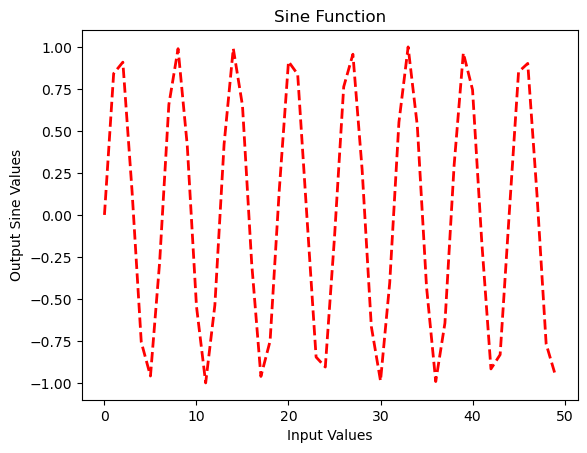

In [26]:
import matplotlib.pyplot as plt
import math
%matplotlib inline 

x = [i for i in range(50)]
sin_values = [math.sin(i) for i in x]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, sin_values, "r--", linewidth=2)

plt.xlabel("Input Values")
plt.ylabel("Output Sine Values")
plt.title("Sine Function")
plt.show()